In [1]:
import pandas as pd 
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
pingees

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Q1

Histogram using 

In [22]:
import pandas as pd
import plotly.express as px

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Create a histogram for flipper_length_mm for each species
fig = px.histogram(penguins, 
                   x='flipper_length_mm', 
                   color='species', 
                   barmode='overlay', 
                   title='Flipper Length Distribution by Species',
                   labels={'flipper_length_mm': 'Flipper Length (mm)', 'species': 'Species'},
                   height=600)

# Update layout to prevent overlapping
fig.update_traces(opacity=0.75)  # Set transparency to avoid overlap
fig.update_layout(xaxis_title='Flipper Length (mm)',
                  yaxis_title='Count',
                  legend_title='Species',
                  title_x=0.5)  # Center the title

# Show the figure
fig.show()


In [23]:
import pandas as pd
import plotly.express as px

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Create a histogram for flipper_length_mm for each species
fig = px.histogram(penguins, 
                   x='flipper_length_mm', 
                   color='species', 
                   barmode='overlay', 
                   title='Flipper Length Distribution by Species',
                   labels={'flipper_length_mm': 'Flipper Length (mm)', 'species': 'Species'},
                   height=600)

# Calculate mean and median for each species
species_stats = penguins.groupby('species')['flipper_length_mm'].agg(['mean', 'median']).reset_index()

# Add vertical lines for mean and median
for _, row in species_stats.iterrows():
    species = row['species']
    mean_value = row['mean']
    median_value = row['median']
    
    # Add mean line
    fig.add_vline(x=mean_value, line_dash='dash', line_color='red',
                   annotation_text=f'Mean: {mean_value:.1f}', 
                   annotation_position='top right', 
                   annotation_font_size=10, 
                   annotation=dict(text=f'Mean: {mean_value:.1f} ({species})', showarrow=True, arrowhead=1))
    
    # Add median line
    fig.add_vline(x=median_value, line_dash='dash', line_color='blue',
                   annotation_text=f'Median: {median_value:.1f}', 
                   annotation_position='bottom right', 
                   annotation_font_size=10, 
                   annotation=dict(text=f'Median: {median_value:.1f} ({species})', showarrow=True, arrowhead=1))

# Update layout to prevent overlapping
fig.update_traces(opacity=0.75)  # Set transparency to avoid overlap
fig.update_layout(xaxis_title='Flipper Length (mm)',
                  yaxis_title='Count',
                  legend_title='Species',
                  title_x=0.5)  # Center the title

# Show the figure
fig.show()


In [24]:
import pandas as pd
import plotly.express as px

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Create a histogram for flipper_length_mm for each species
fig = px.histogram(penguins, 
                   x='flipper_length_mm', 
                   color='species', 
                   barmode='overlay', 
                   title='Flipper Length Distribution by Species',
                   labels={'flipper_length_mm': 'Flipper Length (mm)', 'species': 'Species'},
                   height=600)

# Calculate statistics for each species: mean, std, IQR (25th and 75th percentiles)
species_stats = penguins.groupby('species')['flipper_length_mm'].agg(
    mean='mean', 
    std='std', 
    q1=lambda x: x.quantile(0.25), 
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Add vertical rectangles (vrect) for IQR and two standard deviations from the mean
for _, row in species_stats.iterrows():
    species = row['species']
    mean_value = row['mean']
    std_value = row['std']
    q1 = row['q1']
    q3 = row['q3']
    
    # Interquartile Range (IQR) rectangle (25th to 75th percentile)
    fig.add_vrect(x0=q1, x1=q3, 
                  fillcolor="green", opacity=0.2, line_width=0,
                  annotation_text=f'IQR ({species})', 
                  annotation_position='top left',
                  annotation_font_size=10)
    
    # Two Standard Deviations rectangle (mean - 2*std to mean + 2*std)
    fig.add_vrect(x0=mean_value - 2 * std_value, x1=mean_value + 2 * std_value, 
                  fillcolor="yellow", opacity=0.2, line_width=0,
                  annotation_text=f'2 Std Dev ({species})', 
                  annotation_position='bottom left',
                  annotation_font_size=10)

# Update layout to prevent overlapping
fig.update_traces(opacity=0.75)  # Set transparency to avoid overlap
fig.update_layout(xaxis_title='Flipper Length (mm)',
                  yaxis_title='Count',
                  legend_title='Species',
                  title_x=0.5)  # Center the title

# Show the figure
fig.show()


In [25]:
import pandas as pd
import plotly.express as px

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Create a histogram for flipper_length_mm for each species with subplots for each species
fig = px.histogram(penguins, 
                   x='flipper_length_mm', 
                   color='species', 
                   facet_col='species',  # Create subplots based on species
                   title='Flipper Length Distribution by Species',
                   labels={'flipper_length_mm': 'Flipper Length (mm)', 'species': 'Species'},
                   height=600)

# Calculate statistics for each species: mean, std, IQR (25th and 75th percentiles)
species_stats = penguins.groupby('species')['flipper_length_mm'].agg(
    mean='mean', 
    std='std', 
    q1=lambda x: x.quantile(0.25), 
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Add vertical rectangles (vrect) for IQR and two standard deviations from the mean for each species
for _, row in species_stats.iterrows():
    species = row['species']
    mean_value = row['mean']
    std_value = row['std']
    q1 = row['q1']
    q3 = row['q3']
    
    # Interquartile Range (IQR) rectangle (25th to 75th percentile)
    fig.add_vrect(x0=q1, x1=q3, 
                  fillcolor="green", opacity=0.3, line_width=0,
                  annotation_text=f'IQR ({species})', 
                  annotation_position='top left',
                  annotation_font_size=10,
                  row=1, col={'Adelie': 1, 'Chinstrap': 2, 'Gentoo': 3}[species])  # Subplot-specific
    
    # Two Standard Deviations rectangle (mean - 2*std to mean + 2*std)
    fig.add_vrect(x0=mean_value - 2 * std_value, x1=mean_value + 2 * std_value, 
                  fillcolor="yellow", opacity=0.3, line_width=0,
                  annotation_text=f'2 Std Dev ({species})', 
                  annotation_position='bottom left',
                  annotation_font_size=10,
                  row=1, col={'Adelie': 1, 'Chinstrap': 2, 'Gentoo': 3}[species])  # Subplot-specific

# Update layout to prevent overlapping
fig.update_traces(opacity=0.75)  # Set transparency for the bars
fig.update_layout(xaxis_title='Flipper Length (mm)',
                  yaxis_title='Count',
                  title_x=0.5,  # Center the title
                  showlegend=False)  # Disable the legend for clarity in subplots

# Show the figure
fig.show()


In [26]:
import pandas as pd
import plotly.express as px

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Create a histogram for flipper_length_mm for each species with subplots for each species
fig = px.histogram(penguins, 
                   x='flipper_length_mm', 
                   color='species', 
                   facet_col='species',  # Create subplots based on species
                   title='Flipper Length Distribution by Species with Mean, Median, IQR, and 2*STD',
                   labels={'flipper_length_mm': 'Flipper Length (mm)', 'species': 'Species'},
                   height=600)

# Calculate statistics for each species: mean, median, std, IQR (25th and 75th percentiles)
species_stats = penguins.groupby('species')['flipper_length_mm'].agg(
    mean='mean', 
    median='median',
    std='std', 
    q1=lambda x: x.quantile(0.25), 
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Add vertical rectangles (vrect) for IQR and two standard deviations from the mean for each species
for _, row in species_stats.iterrows():
    species = row['species']
    mean_value = row['mean']
    median_value = row['median']
    std_value = row['std']
    q1 = row['q1']
    q3 = row['q3']
    
    # Interquartile Range (IQR) rectangle (25th to 75th percentile)
    fig.add_vrect(x0=q1, x1=q3, 
                  fillcolor="green", opacity=0.3, line_width=0,
                  annotation_text=f'IQR ({species})', 
                  annotation_position='top left',
                  annotation_font_size=10,
                  row=1, col={'Adelie': 1, 'Chinstrap': 2, 'Gentoo': 3}[species])  # Subplot-specific
    
    # Two Standard Deviations rectangle (mean - 2*std to mean + 2*std)
    fig.add_vrect(x0=mean_value - 2 * std_value, x1=mean_value + 2 * std_value, 
                  fillcolor="yellow", opacity=0.3, line_width=0,
                  annotation_text=f'2 Std Dev ({species})', 
                  annotation_position='bottom left',
                  annotation_font_size=10,
                  row=1, col={'Adelie': 1, 'Chinstrap': 2, 'Gentoo': 3}[species])  # Subplot-specific

    # Add mean line
    fig.add_vline(x=mean_value, line_dash='dash', line_color='red',
                  annotation_text=f'Mean: {mean_value:.1f}', 
                  annotation_position='top right', 
                  annotation_font_size=10, 
                  row=1, col={'Adelie': 1, 'Chinstrap': 2, 'Gentoo': 3}[species])
    
    # Add median line
    fig.add_vline(x=median_value, line_dash='dash', line_color='blue',
                  annotation_text=f'Median: {median_value:.1f}', 
                  annotation_position='bottom right', 
                  annotation_font_size=10, 
                  row=1, col={'Adelie': 1, 'Chinstrap': 2, 'Gentoo': 3}[species])

# Update layout to prevent overlapping
fig.update_traces(opacity=0.75)  # Set transparency for the bars
fig.update_layout(xaxis_title='Flipper Length (mm)',
                  yaxis_title='Count',
                  title_x=0.5,  # Center the title
                  showlegend=False)  # Disable the legend for clarity in subplots

# Show the figure
fig.show()


In [27]:
import pandas as pd
import plotly.express as px

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Create a histogram for flipper_length_mm for each species
fig = px.histogram(penguins, 
                   x='flipper_length_mm', 
                   color='species', 
                   barmode='overlay', 
                   title='Flipper Length Distribution by Species with Mean, Median, IQR, and 2*STD',
                   labels={'flipper_length_mm': 'Flipper Length (mm)', 'species': 'Species'},
                   height=600)

# Calculate statistics for each species: mean, median, std, IQR (25th and 75th percentiles)
species_stats = penguins.groupby('species')['flipper_length_mm'].agg(
    mean='mean', 
    median='median',
    std='std', 
    q1=lambda x: x.quantile(0.25), 
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Add vertical rectangles (vrect) for IQR and two standard deviations from the mean for each species
for _, row in species_stats.iterrows():
    species = row['species']
    mean_value = row['mean']
    median_value = row['median']
    std_value = row['std']
    q1 = row['q1']
    q3 = row['q3']
    
    # Interquartile Range (IQR) rectangle (25th to 75th percentile)
    fig.add_vrect(x0=q1, x1=q3, 
                  fillcolor="green", opacity=0.2, line_width=0,
                  annotation_text=f'IQR ({species})', 
                  annotation_position='top left',
                  annotation_font_size=10)
    
    # Two Standard Deviations rectangle (mean - 2*std to mean + 2*std)
    fig.add_vrect(x0=mean_value - 2 * std_value, x1=mean_value + 2 * std_value, 
                  fillcolor="yellow", opacity=0.2, line_width=0,
                  annotation_text=f'2 Std Dev ({species})', 
                  annotation_position='bottom left',
                  annotation_font_size=10)

    # Add mean line
    fig.add_vline(x=mean_value, line_dash='dash', line_color='red',
                  annotation_text=f'Mean: {mean_value:.1f} ({species})', 
                  annotation_position='top right', 
                  annotation_font_size=10)
    
    # Add median line
    fig.add_vline(x=median_value, line_dash='dash', line_color='blue',
                  annotation_text=f'Median: {median_value:.1f} ({species})', 
                  annotation_position='bottom right', 
                  annotation_font_size=10)

# Update layout to prevent overlapping
fig.update_traces(opacity=0.75)  # Set transparency for the bars
fig.update_layout(xaxis_title='Flipper Length (mm)',
                  yaxis_title='Count',
                  title_x=0.5,  # Center the title
                  showlegend=True)  # Enable legend to distinguish species

# Show the figure
fig.show()


#### SUMMARY OF CHATBOT INTERACTION


In this session, we focused on creating a combined histogram of the "flipper_length_mm" variable from the penguins dataset using Plotly. The dataset was sourced from this link. The main objectives were to visualize the distribution of flipper lengths for three penguin species: Adelie, Chinstrap, and Gentoo, while incorporating key statistical markers such as mean, median, interquartile range (IQR), and two standard deviations from the mean.

Steps Taken:
Loading the Dataset: We began by importing the necessary libraries and loading the penguins dataset.

Creating a Combined Histogram: We used Plotly Express to create a single histogram that displayed the flipper length for all three species simultaneously.

Adding Vertical Lines: Vertical lines were added to represent the mean and median values for each species. Special attention was given to ensure that these annotations did not overlap.

Incorporating Vertical Rectangles: Rectangles were added to visually indicate the range of values for the IQR and two standard deviations from the mean for each species.

Addressing Overlap Issues: Throughout the process, efforts were made to prevent text overlap and ensure clear visibility of all elements within the histogram.

Final Adjustments: The layout was refined to enhance clarity, including adjustments to opacity for better visual separation of elements.

The final output included a single histogram with distinct colors for each species, along with non-overlapping annotations for means, medians, IQRs, and standard deviations. This comprehensive visualization was aimed at facilitating an easier interpretation of the flipper length data across the different penguin species.

Conclusion:
The session successfully addressed the task of creating a clear and informative histogram while ensuring that all statistical markers were distinctly represented and easily readable. The collaborative approach allowed for iterative improvements, leading to a well-structured final visualization suitable for academic submission.

Overall the chatbot did not seem to produce the desired outcome needed here is my chatbok link to prove my efforts 
:https://chatgpt.com/share/66f5fb3d-e07c-8012-a911-857c17d80e90


### Q2

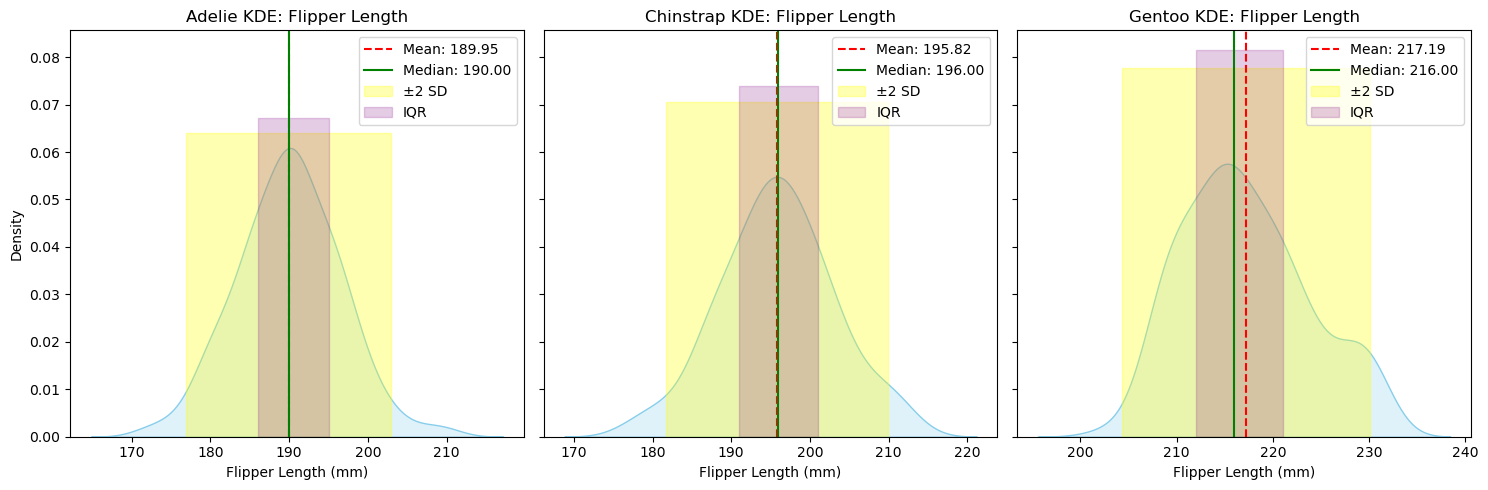

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

# Filter out rows with missing values for flipper_length_mm
df = df.dropna(subset=['flipper_length_mm'])

# Set up the figure and subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Get unique species
species = df['species'].unique()

# Loop through each species to create KDE plots
for i, sp in enumerate(species):
    ax = axes[i]
    data = df[df['species'] == sp]['flipper_length_mm']
    
    # KDE plot for flipper_length_mm
    sns.kdeplot(data, ax=ax, fill=True, color='skyblue')
    
    # Calculate statistics: mean, median, std, range, and IQR
    mean = np.mean(data)
    median = np.median(data)
    std = np.std(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    # Add vertical lines for mean and median
    ax.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    ax.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')
    
    # Highlight the range of two standard deviations
    ax.fill_betweenx(y=[0, ax.get_ylim()[1]], x1=mean - 2 * std, x2=mean + 2 * std, color='yellow', alpha=0.3, label='±2 SD')
    
    # Highlight the interquartile range
    ax.fill_betweenx(y=[0, ax.get_ylim()[1]], x1=q1, x2=q3, color='purple', alpha=0.2, label='IQR')
    
    # Set titles and labels
    ax.set_title(f'{sp} KDE: Flipper Length')
    ax.set_xlabel('Flipper Length (mm)')
    ax.legend()

# Set common Y-label
axes[0].set_ylabel('Density')

# Display the plot
plt.tight_layout()
plt.show()


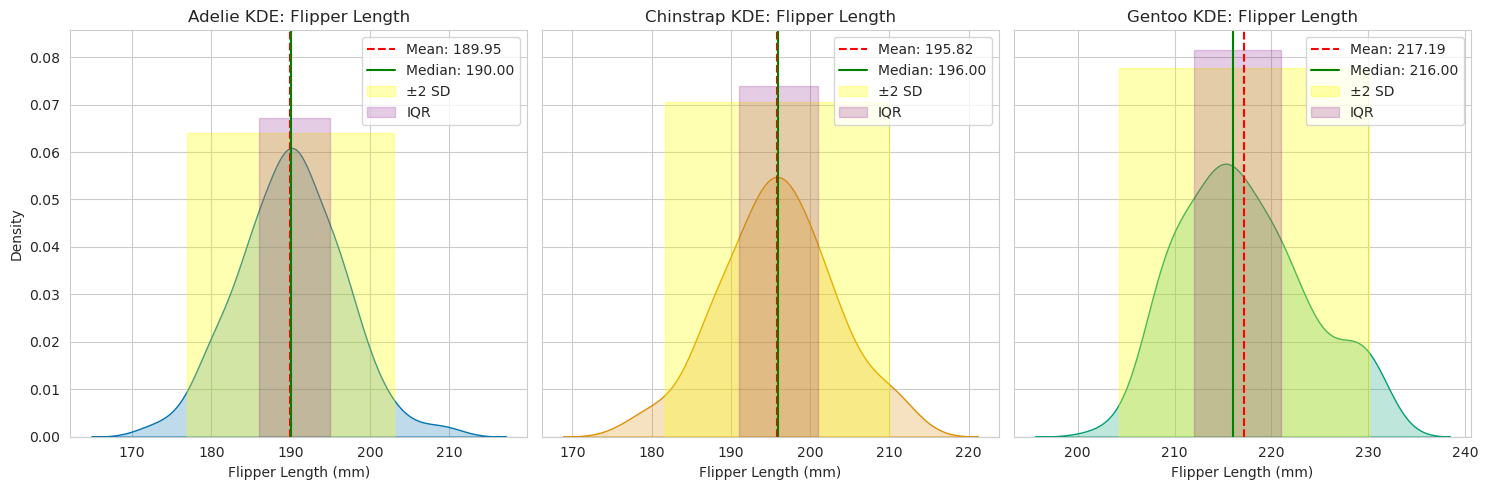

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

# Filter out rows with missing values for flipper_length_mm
df = df.dropna(subset=['flipper_length_mm'])

# Set the style and palette for the plots
sns.set_style("whitegrid")  # You can also try "dark", "white", or "ticks"
colors = sns.color_palette("colorblind", n_colors=len(df['species'].unique()))  # Choose a color palette

# Set up the figure and subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Get unique species
species = df['species'].unique()

# Loop through each species to create KDE plots
for i, sp in enumerate(species):
    ax = axes[i]
    data = df[df['species'] == sp]['flipper_length_mm']
    
    # KDE plot for flipper_length_mm with alternating colors
    sns.kdeplot(data, ax=ax, fill=True, color=colors[i])  # Use color from the palette
    
    # Calculate statistics: mean, median, std, range, and IQR
    mean = np.mean(data)
    median = np.median(data)
    std = np.std(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    # Add vertical lines for mean and median
    ax.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    ax.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')
    
    # Highlight the range of two standard deviations
    ax.fill_betweenx(y=[0, ax.get_ylim()[1]], x1=mean - 2 * std, x2=mean + 2 * std, color='yellow', alpha=0.3, label='±2 SD')
    
    # Highlight the interquartile range
    ax.fill_betweenx(y=[0, ax.get_ylim()[1]], x1=q1, x2=q3, color='purple', alpha=0.2, label='IQR')
    
    # Set titles and labels
    ax.set_title(f'{sp} KDE: Flipper Length')
    ax.set_xlabel('Flipper Length (mm)')
    ax.legend()

# Set common Y-label
axes[0].set_ylabel('Density')

# Display the plot
plt.tight_layout()
plt.show()


Updated code with custom colors:

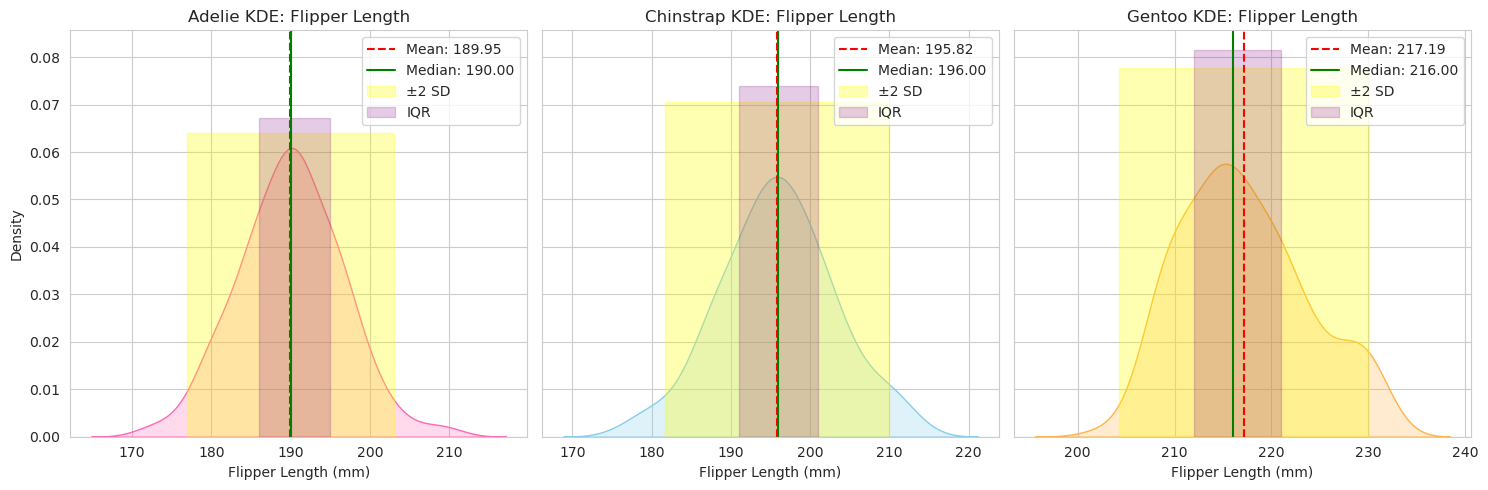

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

# Filter out rows with missing values for flipper_length_mm
df = df.dropna(subset=['flipper_length_mm'])

# Set the style for the plots
sns.set_style("whitegrid")  # You can also try "dark", "white", or "ticks"

# Define custom colors for each species
custom_colors = ['#FF69B4', '#87CEEB', '#FFB347']  # Pink, Baby Blue, Pastel Orange

# Set up the figure and subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Get unique species
species = df['species'].unique()

# Loop through each species to create KDE plots
for i, sp in enumerate(species):
    ax = axes[i]
    data = df[df['species'] == sp]['flipper_length_mm']
    
    # KDE plot for flipper_length_mm with custom colors
    sns.kdeplot(data, ax=ax, fill=True, color=custom_colors[i])  # Use custom color
    
    # Calculate statistics: mean, median, std, range, and IQR
    mean = np.mean(data)
    median = np.median(data)
    std = np.std(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    # Add vertical lines for mean and median
    ax.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    ax.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')
    
    # Highlight the range of two standard deviations
    ax.fill_betweenx(y=[0, ax.get_ylim()[1]], x1=mean - 2 * std, x2=mean + 2 * std, color='yellow', alpha=0.3, label='±2 SD')
    
    # Highlight the interquartile range
    ax.fill_betweenx(y=[0, ax.get_ylim()[1]], x1=q1, x2=q3, color='purple', alpha=0.2, label='IQR')
    
    # Set titles and labels
    ax.set_title(f'{sp} KDE: Flipper Length')
    ax.set_xlabel('Flipper Length (mm)')
    ax.legend()

# Set common Y-label
axes[0].set_ylabel('Density')

# Display the plot
plt.tight_layout()
plt.show()


#### SUMMARY OF CHATBOT INTERACTION

Chatbot Session Summary
Date: September 26, 2024

User: Tehreem Aftab

Session Overview:

Penguins Dataset Analysis:

Tehreem requested assistance in creating a Kernel Density Estimation (KDE) plot for flipper_length_mm for each species in the penguins dataset using Seaborn.
Tehreem wanted the plots to be arranged in a single row and to highlight statistical features such as the mean, median, and the range defined by two standard deviations.
Code Implementation:

A code example was provided that used Seaborn and Matplotlib to create the KDE plots.
The code included features like vertical lines for mean and median, shaded areas for ±2 standard deviations, and the interquartile range (IQR).
Color Customization:

Tehreem expressed interest in alternating the coloring of the figure for clarity.
An explanation was given on how to utilize Seaborn themes and palettes, specifically using sns.set_style() and sns.set_palette().
Specific Color Request:

Tehreem requested specific colors: pink, baby blue, and pastel orange for the KDE plots.
The code was updated to incorporate these custom colors using their hex values.
Conclusion:

Tehreem confirmed that they would like a summary of the session to submit as a record of interactions.
Url Link to ChatBot Session: https://chatgpt.com/share/66f60021-76cc-8012-b3b7-eb3d47b69d42

# Q3

Description 

Box Plots : box plots also known as 'whisker plots' are most known as plots that ' graph summarizing a set of data'. In which the shape of the data represents how the data is distributed. For example, the whiskers represent the spread of the data, with the left whisker indicating the lowest data point and the right whisker indicating the highest. This helps us easily examine the range of the data, calculated as the difference between the highest and lowest values. When analyzing a box plot the line splitting the box into two represents the median in which the left end of the box shows the median of the left side and the right end of the box shows the median of the right side (when the box is split into half). Additionally, it also gives us the information on the first quartile (end of left whisker to end of left box) , second quartile (end of left box to the median line where the box is split), third quartile (midean line where box is split to the right end of the box), fourth quartile (the end of the right side of box to the end of the right whisker)

Pros: 
    -Summarize data such as the key statistics range, IQR, outliers etc in just one concise graph - we can easily determine these values just by looking at the box plot.
    -They effectively showcase outliers we are able to identify these inorder to prevent ourselves from misleading data interperation

Cons:
    -Although it does summarzie the data and its great that we can visually see everything in one place it doesn't provide a detailed analysis of data such as trends in data (box plots won't showcase the distribution shape)
    -often harder to understand in my opinion its quite complicated compared to other graphs such as histographs or bar graphs
    -don't show frequency distributions
    
Histograms : Histograms is similar to a bar graph in terms of display, and in my opinion its easier to comprehend because it displays the distribution of data over several numeric values in a logical range into a series of bars showcasing data trends and very much easily showing frequency distribution. They can be paired with the most suitable intervals to comprehend the data more easily. 

Pros:
   -histograms allow graph readers to rapidly identify distribution trends such as the highest peak
   -fairly easy to comprehend the data because of the simplicity of it - allows us to determine whether its a normal distribution, if the graph is skewed etc
   -allows to see the frequency distribution fairly easily
   -We can detect outliers using them
   

Cons:
    - the size of the intervals can sometimes not showcase a good representation of the data, trends over a certain data point may not be represented clearly. 

KDEs : These graphs are kind of like parabolas because they create smooth curves on a graph to represent the data. As opposed to a histogram KDE graph showcases the data using smooth curves to showcase where most data points lie - instead of a bar the height of the curve in a KDE graph showcases the density of the data points around that value so the higher the data points the higher the density.

Pros: 
   -Can visually see at what value the data points are most clustered 
   -they show very smooth representations of the data as opposed to harsh lines - show a very smooth trend
   -there shape is flexibile similar to histograms a KDE graph can display multiple peaks by increasing the height of a curve throughout the graph several times.
   -just like histograms we can easily shape the width or parameters to highlight different features, trends, and curves that occur in the data.
Cons: 
   -Just like histograms we can't see exact values we can only see the trend over an interval or the density of data points over a certain interval

#### SUMMARY OF CHATGPT SESSION  - INCLUDING CHAT GPT ANALYSIS AND PROS AND CONS

Chatbot Session Summary
Topic: Contrasting Data Visualization Methods (Box Plots, Histograms, and KDEs)

Description and Analysis:

Box Plots:

Defined as "whisker plots" summarizing data distribution, highlighting median, quartiles, and outliers.
Pros: Efficiently summarizes key statistics, clearly identifies outliers, and allows for easy comparisons across groups.
Cons: Limited detail on distribution shape, can be less intuitive, and doesn’t show frequency distributions.
Histograms:

Described as similar to bar graphs, showing the distribution of data over intervals.
Pros: Simple and intuitive, allows for easy identification of distribution trends and outliers.
Cons: Sensitivity to bin size can distort representation, may oversimplify data.
Kernel Density Estimators (KDEs):

Explained as smooth curves representing data density, showing where most data points lie.
Pros: Visually clear representation of data distribution, flexibility in highlighting trends, and effective for multimodal data.
Cons: Less intuitive for some users, sensitive to bandwidth settings, and doesn’t clearly show outliers.
Preference Insights:

Discussed reasons why someone might prefer histograms, box plots, or KDEs based on clarity, summary statistics, and distribution details.
Pros and Cons Summary:

Provided a concise list of pros and cons for each visualization method.


CHATBOT SESSION URL LINK: https://chatgpt.com/share/66f61339-4540-8012-af4c-6018907ce189




#### My Preference

I personally prefer using histograms as those are the most easiest to comprehend for me. However, I do also believe that a histogram is not suitable for all kinds of data, infact each of these three methods of data distributions can not be the best for all sets of data. In some cases, a KBE distribution would be more useful, in others a box plot. It really depends on how you are trying to interpret the data, are you trying to understand the data? are you trying to understand the trends? does the standard deviation matter to you? does the IQR? in the end it's really what particular aspect of the dataset you are trying to analyze and then based on that you use the distribution that matches best with your analysis. Overall, however, in terms of my prefrence again the visual simplicity, the ability to comprehend a data trend based on the peaks, the skewdness, comprehending distribution shape are all the perks that come from a histogram for me, and years of experience with histograms had made it my most preferable choice because it is what I'm most comftrable with using and further interperating. 

## Q4

In [21]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)

    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


In [20]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

# Create DataFrame for easier statistics calculation
df = pd.DataFrame({
    'A': data1,
    'B': data2,
    'C': data3,
    'D': data4
})

# Calculate and display statistics
for col in df.columns:
    mean_np = np.mean(df[col])
    std_np = np.std(df[col], ddof=1)  # Sample standard deviation
    var_np = np.var(df[col], ddof=1)  # Sample variance
    
    mean_pd = df[col].mean()
    std_pd = df[col].std(ddof=1)  # Sample standard deviation
    var_pd = df[col].var(ddof=1)  # Sample variance
    
    print(f"Statistics for {col}:")
    print(f"  Mean (NumPy): {mean_np}, Mean (Pandas): {mean_pd}")
    print(f"  Std Dev (NumPy): {std_np}, Std Dev (Pandas): {std_pd}")
    print(f"  Variance (NumPy): {var_np}, Variance (Pandas): {var_pd}")
    print()

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)

fig.show()  # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


Statistics for A:
  Mean (NumPy): 5.006245450364179, Mean (Pandas): 5.006245450364179
  Std Dev (NumPy): 2.908092369774935, Std Dev (Pandas): 2.908092369774935
  Variance (NumPy): 8.457001231143197, Variance (Pandas): 8.457001231143197

Statistics for B:
  Mean (NumPy): 4.986229980703159, Mean (Pandas): 4.986229980703159
  Std Dev (NumPy): 1.4637647699323717, Std Dev (Pandas): 1.4637647699323717
  Variance (NumPy): 2.142607301695169, Variance (Pandas): 2.142607301695169

Statistics for C:
  Mean (NumPy): 4.9971571781895, Mean (Pandas): 4.9971571781895
  Std Dev (NumPy): 3.0206554332347024, Std Dev (Pandas): 3.0206554332347024
  Variance (NumPy): 9.124359246330329, Variance (Pandas): 9.124359246330329

Statistics for D:
  Mean (NumPy): 5.990484596737424, Mean (Pandas): 5.990484596737424
  Std Dev (NumPy): 0.49171163898552084, Std Dev (Pandas): 0.49171163898552084
  Variance (NumPy): 0.24178033591382717, Variance (Pandas): 0.24178033591382717



##### 1.Which datasets have similar means and similar variances

A and C

##### 2.Which datasets have similar means but quite different variances
data set A and B  and data set B and C

##### 3.Which datasets have similar variances but quite different means

none

##### 4.Which datasets have quite different means and quite different variances
A and D, B and D, C and D

##### SUMMARY OF CHATBOT SESSION

Here's a summary of our recent chatbot session:

Python Code for Histograms:

You shared a Python code snippet that generates histograms using scipy and plotly for four different datasets.
You asked how to calculate summary statistics (mean, standard deviation, and variance) for these datasets using both NumPy and Pandas.
Implementation:

I provided a modified version of your code that includes:
Creation of a Pandas DataFrame to easily compute statistics.
Calculation and display of the mean, standard deviation, and variance using both NumPy and Pandas methods.
Code Execution:

The updated code retains your histogram plotting while also outputting the calculated statistics for each dataset.
Let me know if you need anything else or if you'd like to delve deeper into any topic!

Url link to chatbot session : https://chatgpt.com/share/66f62c85-8d1c-8012-983f-6000dddcf51f



## Q5

RELATIONSHIP BETWEEN MEAN AND MEDIAN

Code:

In [17]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean() # mean
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

##### Explanation in my own terms

Overall definitions


Measures of central tendency (Mean and Median)
Mean
    The mean also known as the 'average' of a data set is calculated by first adding up all the numbers in the data set and then dividing by how many numbers there are. The mean overall just represents the average of the entire data set in other words it provides a central point that summarzies all the data 
    
Mean: Relationship in terms of code 
    sample1.mean() calculates the mean/average of the data set

Median 
    The median is the middle value in a sorted data set from lowest to highest value, in case where there is an even number date set then the median will be the average of the 2 middle values(basically there mean)

Median: Realtionship in terms of code 
    np.quantile(sample1, [0.5]) calculates the median of the data set 


Relationship in terms of code 

Skewness

(a) Right skewness (positive skew)
Lump of the data at the start (higher) begins at the left and the tail is towards the right side of the graph. When data is right skewed that means that the mean is greater than the median

Right Skew : Relationship in terms of code 
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000) The code creates sample 1 utilizing the Gamma distribution, which is usually skewed to the right. By creating and plotting this dataset, it showcases that the right side of the histogram will have a long tail,therefore, most values are shown to the left and this is because the mean will be higher than the median due to the fact that bigger values assist in pushing the average/mean upwards causing the mean to be greater.

(b) Left skewness  (negative skew)
tail is towards the left side of the graph and lump of the data is towards the right side of the graph. When the data is left skewed that means that the mean is less than the median.
Left Skew : Relationship in terms of code
The code for sample2 takes the negative of sample1 therefore, flipping the data and creating a left skewed distribution therefore most values are shown to the right and since the lower values push the average down the mean will be lower than the median. 

##### SUMMARY OF CHATBOT SESSION

Summary of Chatbot Session
Discussion on Mean and Median:

Explored the definitions and calculations of the mean and median.
Explained the sensitivity of the mean to outliers compared to the median.
Relationship Between Mean and Median:

Discussed how the mean and median can indicate the skewness of a distribution:
In right-skewed distributions, the mean is typically greater than the median.
In left-skewed distributions, the mean is typically less than the median.
Code Explanation:

Analyzed the provided code for generating skewed data using the Gamma distribution.
Explained how to visualize the data with histograms and calculate the mean and median.
Discussed the generation of two datasets:
sample1 (right-skewed).
sample2 (left-skewed).
Skewness:

Defined right and left skewness in simple terms.
Connected the concepts of skewness to the generated datasets and their means and medians.
Simple Explanations:

Provided clear and straightforward explanations of the mean, median, and skewness in relation to the code.

URL link to chatbot session: https://chatgpt.com/share/66f62af4-1384-8012-a7e8-897801f51633

## Q6

I will be using the dataset of nurtition mentioned in the hwk and first use df.head() to print the first 5 rows of the data set to understand its structure

##### SUMMARY STATISTICS

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# Display the first few rows of the dataframe
df.head()




,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0


In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# Display the first few rows of the dataframe
#df.head()

#Displays the information about the dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   restaurant id                  750 non-null    int64  
 1   category id                    750 non-null    int64  
 2   item id                        750 non-null    int64  
 3   serving size (oz)              395 non-null    float64
 4   calories                       750 non-null    int64  
 5   calories from fat              260 non-null    float64
 6   total fat (g)                  750 non-null    object 
 7   total fat (% daily value)      260 non-null    float64
 8   saturated fat (g)              637 non-null    float64
 9   saturated fat (% daily value)  260 non-null    float64
 10  trans fat (g)                  637 non-null    float64
 11  cholesterol (mg)               637 non-null    float64
 12  cholesterol (% daily value)    260 non-null    flo

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# Display the first few rows of the dataframe
#df.head()

#Displays the information about the dataset
#df.info()

# Get summary statistics for numerical columns
df.describe()


,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (% daily value),saturated fat (g),saturated fat (% daily value),trans fat (g),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
count,750.000000,750.000000,750.00000,395.000000,750.000000,260.000000,260.000000,637.000000,260.000000,637.000000,...,750.000000,260.000000,750.000000,260.000000,637.000000,750.000000,637.000000,637.000000,637.000000,637.000000
mean,2126.666667,113.685333,374.50000,10.612996,296.149333,127.096154,21.815385,3.409105,29.965385,0.603297,...,69.574667,15.780769,1.717333,6.530769,25.718995,11.398400,13.430141,7.954474,17.725275,8.819466
std,897.234043,9.956229,216.65064,7.286159,209.034366,127.875914,21.885199,4.972504,26.639209,1.193182,...,65.719590,9.419544,2.075374,6.307057,24.530455,11.119111,20.250714,21.220825,15.739473,10.229923
min,1000.000000,100.000000,0.00000,0.035274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,106.000000,187.25000,5.200000,150.000000,20.000000,3.750000,0.000000,4.750000,0.000000,...,30.000000,10.000000,0.000000,0.000000,5.000000,3.000000,4.000000,0.000000,4.000000,0.000000
50%,2000.000000,111.000000,374.50000,10.158912,260.000000,100.000000,17.000000,0.200000,24.000000,0.000000,...,48.000000,15.000000,1.000000,5.000000,18.000000,9.000000,8.000000,0.000000,15.000000,6.000000
75%,3000.000000,123.000000,561.75000,16.000000,410.000000,200.000000,35.000000,6.000000,48.000000,0.500000,...,85.750000,20.000000,3.000000,10.000000,41.000000,16.000000,15.000000,6.000000,30.000000,15.000000
max,3000.000000,130.000000,749.00000,32.000000,1880.000000,1060.000000,182.000000,30.000000,102.000000,9.000000,...,340.000000,47.000000,21.000000,28.000000,128.000000,118.000000,170.000000,240.000000,70.000000,50.000000


Using the df.describe() method I analyzed that the average amount of calories in fast food items was 296 calories, and the saturated fat was about 30%

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# Display the first few rows of the dataframe
#df.head()

#Displays the information about the dataset
#df.info()

# Get summary statistics for numerical columns
#df.describe()

# Check the columns in the dataset
df.columns

Index(['restaurant id', 'category id', 'item id', 'serving size (oz)',
       'calories', 'calories from fat', 'total fat (g)',
       'total fat (% daily value)', 'saturated fat (g)',
       'saturated fat (% daily value)', 'trans fat (g)', 'cholesterol (mg)',
       'cholesterol (% daily value)', 'sodium (mg)', 'sodium (% daily value)',
       'carbohydrates (g)', 'carbohydrates (% daily value)',
       'dietary fiber (g)', 'dietary fiber (% daily value)', 'sugars (g)',
       'protein (g)', 'vitamin a (% daily value)', 'vitamin c (% daily value)',
       'calcium (% daily value)', 'iron (% daily value)'],
      dtype='object')

In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# Display the first few rows of the dataframe
#df.head()

#Displays the information about the dataset
#df.info()

# Get summary statistics for numerical columns
#df.describe()

# Check the columns in the dataset
#df.columns

#check for missing values in the dataset
df.isnull().sum()

restaurant id                      0
category id                        0
item id                            0
serving size (oz)                355
calories                           0
calories from fat                490
total fat (g)                      0
total fat (% daily value)        490
saturated fat (g)                113
saturated fat (% daily value)    490
trans fat (g)                    113
cholesterol (mg)                 113
cholesterol (% daily value)      490
sodium (mg)                      113
sodium (% daily value)           490
carbohydrates (g)                  0
carbohydrates (% daily value)    490
dietary fiber (g)                  0
dietary fiber (% daily value)    490
sugars (g)                       113
protein (g)                        0
vitamin a (% daily value)        113
vitamin c (% daily value)        113
calcium (% daily value)          113
iron (% daily value)             113
dtype: int64

I examined the dataset for NaN values and found that multiple columns, including 'calories' and 'total fat', exhibit significant missing data, potentially affecting the analysis.

##### VISUALIZATIONS

##### Histogram

In [11]:
import pandas as pd
import plotly.express as px

# Load the dataset
url = "https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv"
data = pd.read_csv(url)

# Create a histogram for the 'calories' column
fig = px.histogram(data, x='calories', title='Distribution of Calories in Fast Food Items')

# Show the figure
fig.show()



Analysis of histogram: 
The histogram I created illustrates that the majority of fast food items cluster around 200-400 calories, with a few items significantly exceeding this range, suggesting potential outliers. The data showcases a positive skew distribution.

##### BOX PLOT

In [12]:
import pandas as pd
import plotly.express as px

# Load the dataset
url = "https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv"
data = pd.read_csv(url)

# Create a box plot for the 'calories' column
fig = px.box(data, y='calories', title='Box Plot of Calories in Fast Food Items')

# Show the figure
fig.show()


###### USE OF CHATBOT TO CREATE VISUALIZATIONS 

Chatbot Session Summary
Data Visualization with Plotly:
Histogram: You requested code to create a histogram using the nutritional dataset from a specified URL. The initial attempt resulted in a ValueError due to an incorrect column name (Calories instead of calories). The corrected code was provided, successfully generating a histogram for the calories column.
Box Plot: You asked for code to create a box plot for the same dataset. The code was provided to visualize the distribution of calories.
KDE Plot: Finally, you requested a Kernel Density Estimation (KDE) plot. I provided code to create a histogram with a density overlay to resemble a KDE plot for the calories column.

Chatbot session url link: https://chatgpt.com/share/66f6229a-a2c0-8012-a2f8-d7aba7f63b81